## PS1 KDE

### Problem 1(a)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/COVIDincubation.txt')

In [3]:
df.head()

,gender,age,symp_days
0,F,52.0,5.0
1,M,42.0,6.5
2,F,32.0,3.0
3,M,22.0,4.0
4,M,41.0,8.0


Text(0, 0.5, 'Frequency for each observation in bin')

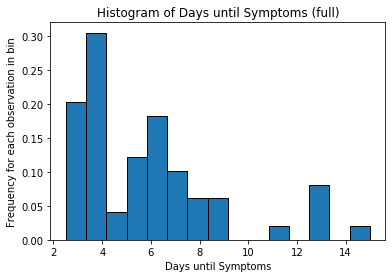

In [4]:
symp_days_val = df['symp_days'].values

num_bins = 15

N_tot, bin_cuts_tot, patches_tot = plt.hist(symp_days_val, num_bins, density=True,
                                           edgecolor = 'black')
plt.title('Histogram of Days until Symptoms (full)')
plt.xlabel('Days until Symptoms')
plt.ylabel('Frequency for each observation in bin')

Text(0, 0.5, 'Frequency for each observation in bin')

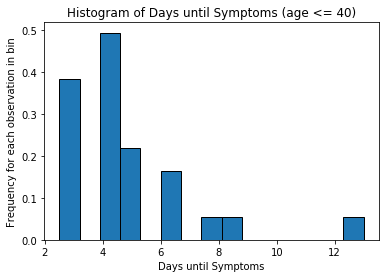

In [5]:
symp_days_young = df['symp_days'][df['age'] <= 40].values

n_tot, bin_cuts_tot, patches_tot = plt.hist(symp_days_young, num_bins, density=True,
                                           edgecolor = 'black')
plt.title('Histogram of Days until Symptoms (age <= 40)')
plt.xlabel('Days until Symptoms')
plt.ylabel('Frequency for each observation in bin')

Text(0, 0.5, 'Frequency for each observation in bin')

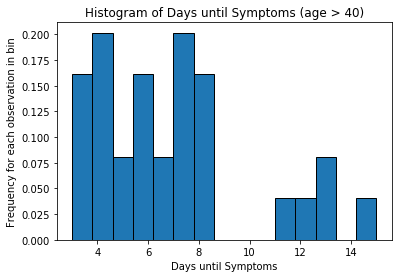

In [6]:
symp_days_old = df['symp_days'][df['age'] > 40].values

n_tot, bin_cuts_tot, patches_tot = plt.hist(symp_days_old, num_bins, density=True,
                                           edgecolor = 'black')
plt.title('Histogram of Days until Symptoms (age > 40)')
plt.xlabel('Days until Symptoms')
plt.ylabel('Frequency for each observation in bin')

### Problem 1(b)

In [7]:
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV, LeaveOneOut

In [8]:
bandwidths = 10 ** np.linspace(-1, 1, 500)

grid_val = GridSearchCV(KernelDensity(kernel = 'gaussian'),
                       {'bandwidth': bandwidths}, cv = LeaveOneOut())

grid_val.fit(symp_days_val.reshape((59, 1)))

bandwidth_val = grid_val.best_params_['bandwidth']

In [9]:
print('Total sample optimal bandwidth is', bandwidth_val)

Total sample optimal bandwidth is 0.8910453324821516


In [10]:
grid_young = GridSearchCV(KernelDensity(kernel = 'gaussian'),
                       {'bandwidth': bandwidths}, cv = LeaveOneOut())

grid_young.fit(symp_days_young.reshape((26, 1)))

bandwidth_young = grid_young.best_params_['bandwidth']

In [11]:
print('Sample <= 40 optimal bandwidth is', bandwidth_young)

Sample <= 40 optimal bandwidth is 1.6233824316122782


In [12]:
grid_old = GridSearchCV(KernelDensity(kernel = 'gaussian'),
                       {'bandwidth': bandwidths}, cv = LeaveOneOut())

grid_old.fit(symp_days_old.reshape((31, 1)))

bandwidth_old = grid_old.best_params_['bandwidth']

In [13]:
print('Sample > 40 optimal bandwidth is', bandwidth_old)

Sample > 40 optimal bandwidth is 1.1861737164524786


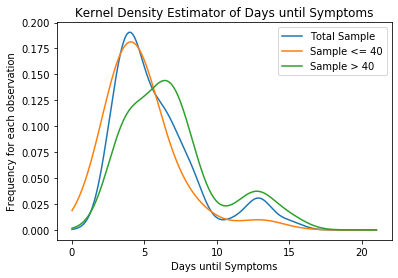

In [14]:
kde_val = KernelDensity(bandwidth = bandwidth_val, kernel = 'gaussian')

kde_val.fit(symp_days_val.reshape((59, 1)))

kde_young = KernelDensity(bandwidth = bandwidth_young, kernel = 'gaussian')

kde_young.fit(symp_days_young.reshape((26, 1)))

kde_old = KernelDensity(bandwidth = bandwidth_old, kernel = 'gaussian')

kde_old.fit(symp_days_old.reshape((31, 1)))

x_pts = np.linspace(0.01, 21, 1000).reshape((1000, 1))
log_prob_val = kde_val.score_samples(x_pts).reshape((1000, 1))
log_prob_young = kde_young.score_samples(x_pts).reshape((1000, 1))
log_prob_old = kde_old.score_samples(x_pts).reshape((1000, 1))

plt.plot(x_pts, np.exp(log_prob_val), label = r'Total Sample')
plt.plot(x_pts, np.exp(log_prob_young), label = r'Sample <= 40')
plt.plot(x_pts, np.exp(log_prob_old), label = r'Sample > 40')
plt.title('Kernel Density Estimator of Days until Symptoms')
plt.xlabel('Days until Symptoms')
plt.ylabel('Frequency for each observation')
plt.legend()

### Problem 1(c) 

The Kernal Density plots show that young people usually develop symptoms earlier than old people. It means that if all people in a family got the COVID-19, when the children got their symptoms, the elders should also be tested and check whether they got the virus. Moreover, the graph shows that after 10 days, the possibility of having symptoms for young people becomes significantly lower than old people. Therefore, they could feel less anxious after that period and take care of people around them that could have been suffering from the anxiaty.   

### Problem 2(a) 

In [15]:
bq_data = np.loadtxt('data/BQ_probmat.txt', delimiter=',')

In [16]:
from scipy.stats import norm, gaussian_kde
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0, 'Percent of BQ received')

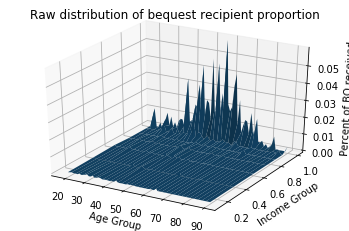

In [17]:
age_vec = np.arange(18, 91)
lambdas = np.array([0.25, 0.25, 0.20, 0.10, 0.10, 0.09, 0.01])
lambdas_mdpts = np.array([0.125, 0.375, 0.60, 0.75, 0.85,
                          0.94, 0.995])
income_mat, age_mat = np.meshgrid(lambdas_mdpts, age_vec)

fig = plt.figure()
ax = fig.gca(projection ='3d')
ax.plot_surface(age_mat, income_mat, bq_data)
ax.set_title('Raw distribution of bequest recipient proportion')
ax.set_xlabel('Age Group')
ax.set_ylabel('Income Group')
ax.set_zlabel('Percent of BQ received')

### Problem 2(b)

In [18]:
bd_df = pd.read_csv('data/BQ_ind_data.txt', delimiter=',')

In [19]:
data = bd_df[['age','income_pctl']].values

In [20]:
bandwidth = 0.1
kernel = gaussian_kde(data.T, bw_method = bandwidth)

In [24]:
age_vec = np.arange(18, 91)
lambdas = np.array([0.25, 0.25, 0.20, 0.10, 0.10, 0.09, 0.01])
lambdas_mdpts = np.array([0.125, 0.375, 0.60, 0.75, 0.85,
                          0.94, 0.995])
income_mat, age_mat = np.meshgrid(lambdas_mdpts, age_vec)

z_vec = np.reshape(kernel(np.vstack([item.ravel() for item in [age_mat, income_mat]])), age_mat.shape)
z_scaled = z_vec / float(np.sum(z_vec))

Text(0.5, 0, 'Percent of BQ received')

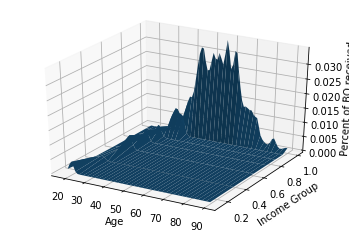

In [25]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(age_mat, income_mat, z_scaled)
ax.set_xlabel('Age')
ax.set_ylabel('Income Group')
ax.set_zlabel('Percent of BQ received')

In [29]:
print('The estimated density for bequest recipients who are age 61 in the 6th lifetime income category =', z_scaled[43,5])
print('While the real density =', bq_data[43,5])

The estimated density for bequest recipients who are age 61 in the 6th lifetime income category = 8.587875700962615e-07
While the real density = 0.0008630400696026425


In [30]:
bws = 10 ** np.linspace(-1, 1, 100)
grid = GridSearchCV(KernelDensity(kernel='gaussian'), {'bandwidth': bws}, cv= LeaveOneOut())
grid.fit(bq_data)
print('The optimal bandwidth is', grid.best_params_["bandwidth"])

The optimal bandwidth is 0.1
